In [1]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# Create a sample data

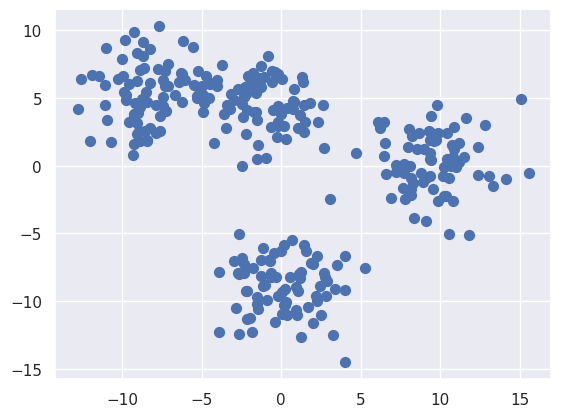

In [7]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300,
                       centers=4,
                       cluster_std=2.1,
                       random_state=7)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [8]:
# write kmeans code here
from sklearn.cluster import KMeans
mykmeans = KMeans(n_clusters = 4,random_state=7)
mykmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=7)

In [9]:
y_kmeans = mykmeans.predict(X)

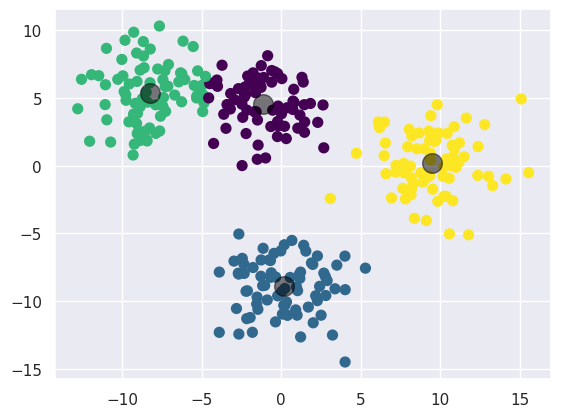

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = mykmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [11]:
# run kmeans for 5 cluster
from sklearn.cluster import KMeans
mykmeans = KMeans(n_clusters = 5,random_state=7)
mykmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=7)

In [12]:
y_kmeans = mykmeans.predict(X)

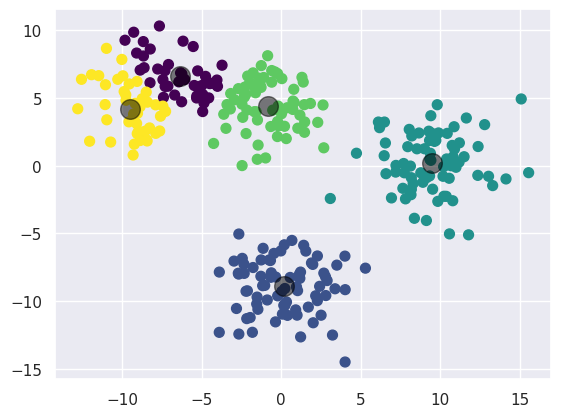

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = mykmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# DBSCAN

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # standardization

Number of clusters: 3
Outliers : 17


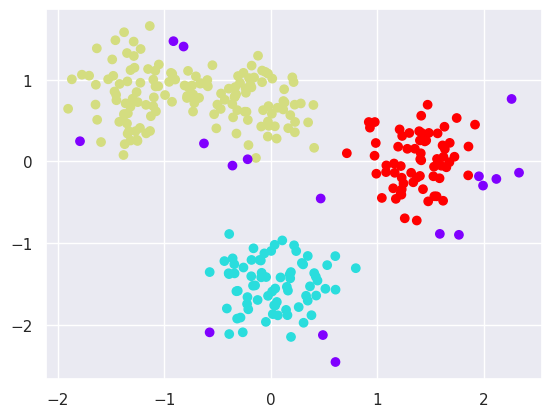

In [15]:
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# increase eps

outliers may reduce

Multiple clusters may be merged based on nearest neighbours

clusters with less density are allowed

Number of clusters: 2
Outliers : 1


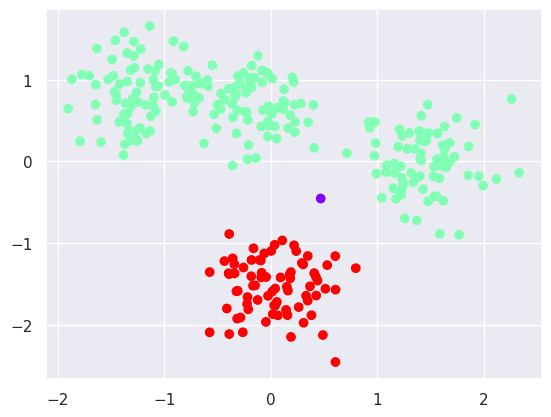

In [18]:
y_pred = DBSCAN(eps=0.57, min_samples=10).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# decrease eps

multiple clusters with high density will be created

outliers may increase

Number of clusters: 2
Outliers : 280


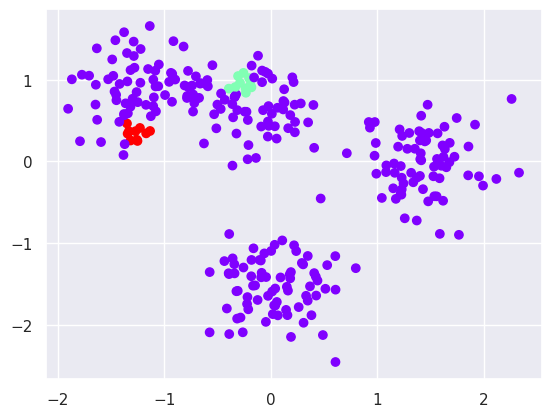

In [21]:
y_pred = DBSCAN(eps=0.14, min_samples=10).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# increase min_samples

multiple dense clusters are formed

outliers may increase

Number of clusters: 3
Outliers : 65


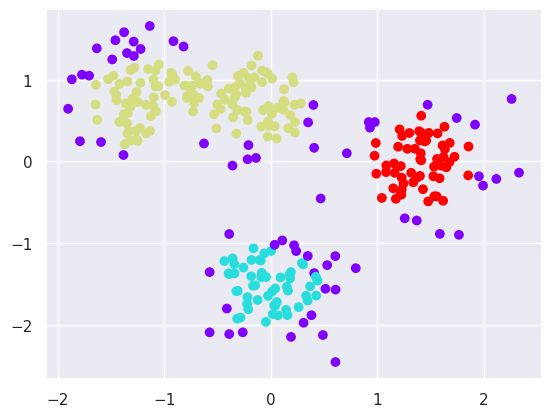

In [22]:
y_pred = DBSCAN(eps=0.3, min_samples=20).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# decrease min_samples

multiple clusters with less density are formed

outliers may reduce

Number of clusters: 3
Outliers : 6


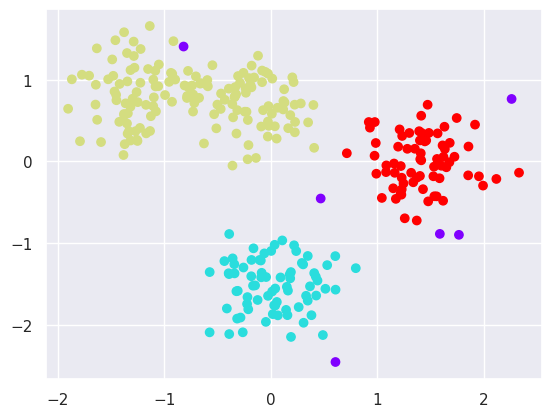

In [23]:
y_pred = DBSCAN(eps=0.3, min_samples=5).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# Knee finding in DBSCAN

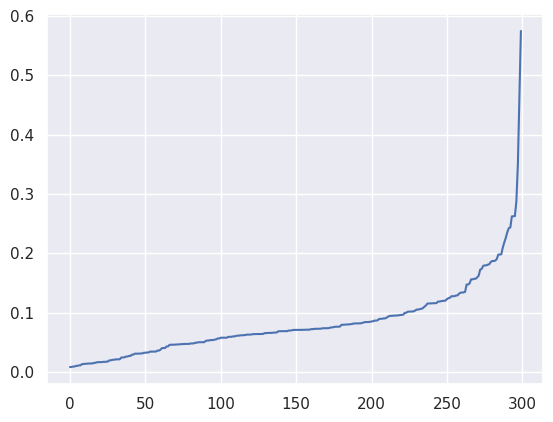

In [24]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# How to say that eps and min_samples is good combination ?

thumb rule :

if no of outliers getting generated are 5% or less

# Hierarchical Clustering

## draw dendrogram

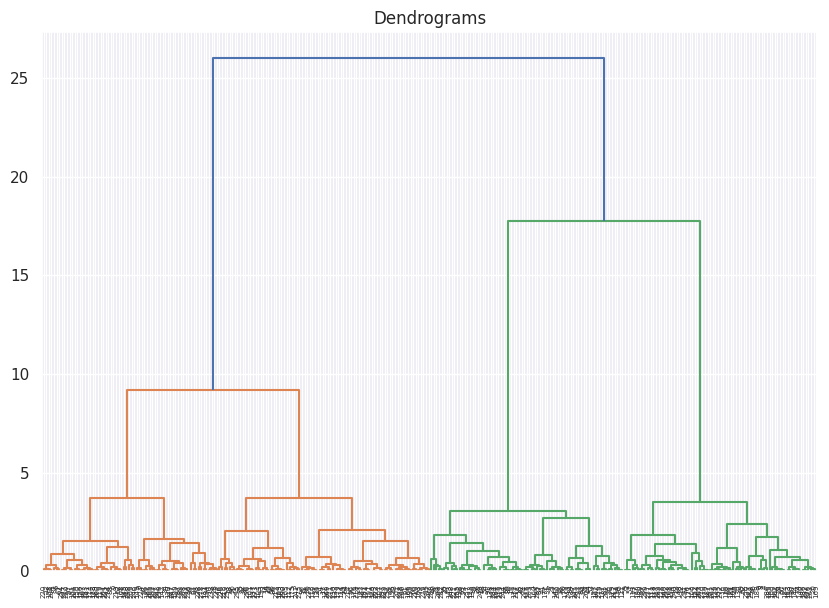

In [25]:
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=50, color='r', linestyle='--')

## Agglomerative Clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering( n_clusters= 3 , affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


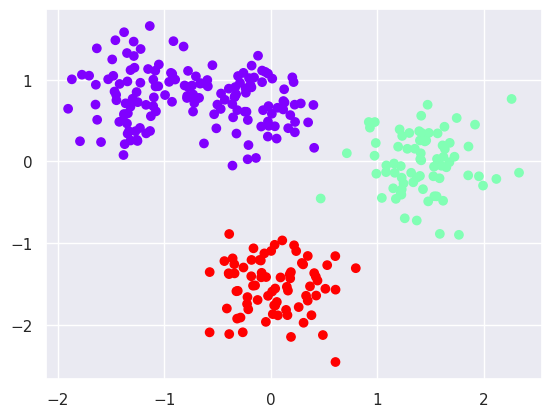

In [27]:
plt.scatter(X[:,0], X[:,1], c=cluster_labels, cmap='rainbow')